In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [4]:
books = pd.read_csv('data/BX-Books.csv', sep=";",  on_bad_lines="skip", encoding='latin-1')

/var/folders/y5/ky9fhnps3zvftsyqvxb642zm0000gn/T/ipykernel_13235/2416914503.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/BX-Books.csv', sep=";",  on_bad_lines="skip", encoding='latin-1')


In [5]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [6]:
books.shape

(271360, 8)

In [7]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [8]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [9]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [11]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [12]:
users = pd.read_csv('data/BX-Users.csv', sep=";",on_bad_lines="skip" , encoding='latin-1')

In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
users.shape

(278858, 3)

In [15]:
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [16]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [17]:
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines="skip", encoding='latin-1')

In [18]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
ratings.shape

(1149780, 3)

In [26]:
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [30]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [31]:
print(books.shape)
print(users.shape) 
print(ratings.shape)

(271360, 6)
(278858, 3)
(1149780, 3)


In [37]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [38]:
ratings['user_id'].unique().shape

(105283,)

In [39]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [40]:
x

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: count, Length: 105283, dtype: bool

In [51]:
x[x].shape

(899,)

In [53]:
y= x[x].index

In [55]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [57]:
ratings = ratings[ratings['user_id'].isin(y)]

In [59]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [61]:
ratings.shape

(526356, 3)

In [63]:
books.head(2)

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [65]:
ratings_with_books = ratings.merge(books, on='ISBN')

In [66]:
ratings_with_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [67]:
ratings_with_books.shape

(487671, 8)

In [68]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [69]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [70]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [74]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [75]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [76]:
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [77]:
final_rating.shape

(487671, 9)

In [79]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [83]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [84]:
final_rating.shape

(61853, 9)

In [91]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [93]:
final_rating.shape

(59850, 9)

In [95]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [97]:
# Split data into training and testing sets
train_data, test_data = train_test_split(final_rating, test_size=0.2, random_state=42)

# Creating the pivot tables for training and test data
train_pivot = train_data.pivot_table(columns='user_id', index='title', values='rating').fillna(0)
test_pivot = test_data.pivot_table(columns='user_id', index='title', values='rating').fillna(0)


In [99]:
train_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Compute cosine similarity for training data
train_similarity_scores = cosine_similarity(train_pivot)

# Build the Nearest Neighbors model
model = NearestNeighbors(algorithm='brute')
model.fit(train_pivot.values)


NearestNeighbors(algorithm='brute')

In [101]:
def recommend_book(book_name):
    distances, suggestions = model.kneighbors(train_pivot.loc[book_name].values.reshape(1, -1), n_neighbors=4)
    for i in range(len(suggestions)):
        books = train_pivot.index[suggestions[i]]
        for j in books:
            if j == book_name:
                continue
            print(j)


In [117]:
def get_recommendations(book_name, n_neighbors=5):
    distances, suggestions = model.kneighbors(train_pivot.loc[book_name].values.reshape(1, -1), n_neighbors=n_neighbors)
    # return train_pivot.index[suggestions[0]].tolist()
    print(type(suggestions))
    return suggestions

def evaluate_precision_recall(test_pivot, n_neighbors=5):
    precision_list = []
    recall_list = []
    
    for book in test_pivot.index:
        if book in train_pivot.index:
            # True positive: the actual ratings in the test set
            true_ratings = test_pivot.loc[book].values
            true_positive = np.where(true_ratings > 0, 1, 0)  # Binarize ratings for precision/recall
            
            # Get recommendations
            recommendations = get_recommendations(book, n_neighbors)
            pred_ratings = []
            for rec_book in recommendations:
                if rec_book in test_pivot.index:
                    pred_ratings.append(test_pivot.loc[rec_book].values)
                else:
                    pred_ratings.append(np.zeros_like(true_ratings))
            pred_ratings = np.mean(pred_ratings, axis=0)
            predicted_positive = np.where(pred_ratings > 0, 1, 0)  # Binarize ratings for precision/recall

 # Calculate precision and recall
            if np.sum(true_positive) > 0:  # Avoid division by zero
                precision = precision_score(true_positive, predicted_positive, zero_division=0)
                recall = recall_score(true_positive, predicted_positive, zero_division=0)
                precision_list.append(precision)
                recall_list.append(recall)
    
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    return avg_precision, avg_recall


In [119]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 6)

<class 'numpy.ndarray'>


array([[237, 238, 240, 184, 562, 686]])

In [107]:
# Calculate and print Precision and Recall
precision, recall = evaluate_precision_recall(test_pivot)
print(f"Precision of the recommendation system: {precision}")
print(f"Recall of the recommendation system: {recall}")

Precision of the recommendation system: 0.35983184169322174
Recall of the recommendation system: 1.0


In [93]:
# Data from the table
k_values = [2, 3, 4, 5, 6, 10]
precision = [0.6913, 0.529, 0.426, 0.359, 0.3127, 0.196]
recall = [1, 1, 1, 1, 1, 1]

# Calculate F1-score for each k-value
f1_scores = []
accuracies = []

for p, r in zip(precision, recall):
    # Calculate F1-score
    if p + r == 0:
        f1 = 0
    else:
        f1 = 2 * (p * r) / (p + r)
    f1_scores.append(f1)

    # Assume a scenario where Recall is perfect (Recall = 1)
    tp = 1  # True Positives (for simplicity, assume 1 positive instance correctly identified)
    fp = (1 - p) * tp / p  # False Positives derived from precision
    tn = tp * (1 / p - 1)  # True Negatives, inferred assuming no false negatives
    total_predictions = tp + fp + tn  # Total predictions made by the model
    
    # Calculate Accuracy
    accuracy = (tp + tn) / total_predictions
    accuracies.append(accuracy)

# Display results
for i, k in enumerate(k_values):
    print(f"k={k}: Precision={precision[i]}, Recall={recall[i]}, F1-score={f1_scores[i]}, Accuracy={accuracies[i]}")


k=2: Precision=0.6913, Recall=1, F1-score=0.817477679891208, Accuracy=0.7641170627340108
k=3: Precision=0.529, Recall=1, F1-score=0.6919555264879007, Accuracy=0.6798096532970769
k=4: Precision=0.426, Recall=1, F1-score=0.5974754558204769, Accuracy=0.6353240152477764
k=5: Precision=0.359, Recall=1, F1-score=0.5283296541574687, Accuracy=0.6093845216331505
k=6: Precision=0.3127, Recall=1, F1-score=0.4764226403595642, Accuracy=0.5926628341136727
k=10: Precision=0.196, Recall=1, F1-score=0.3277591973244147, Accuracy=0.5543237250554324


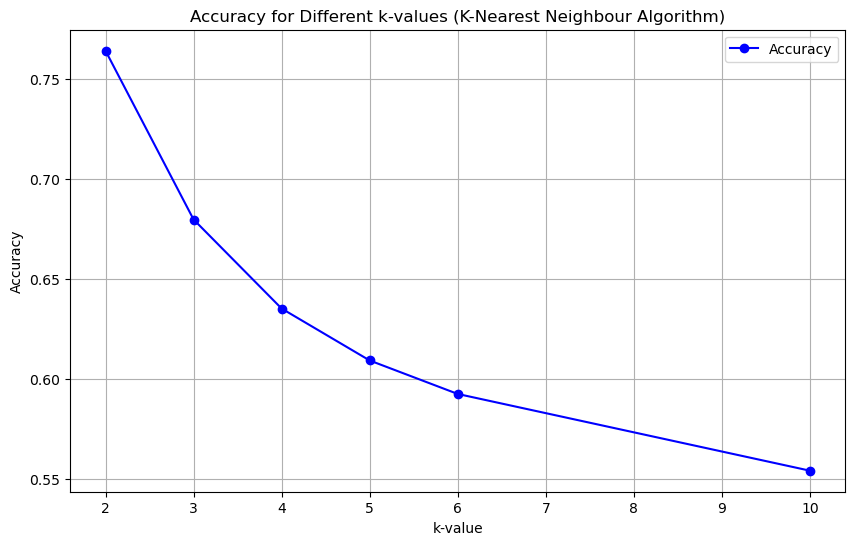

In [96]:
# Plotting the accuracy data
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy', color='blue')

# Adding titles and labels
plt.title('Accuracy for Different k-values (K-Nearest Neighbour Algorithm)')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

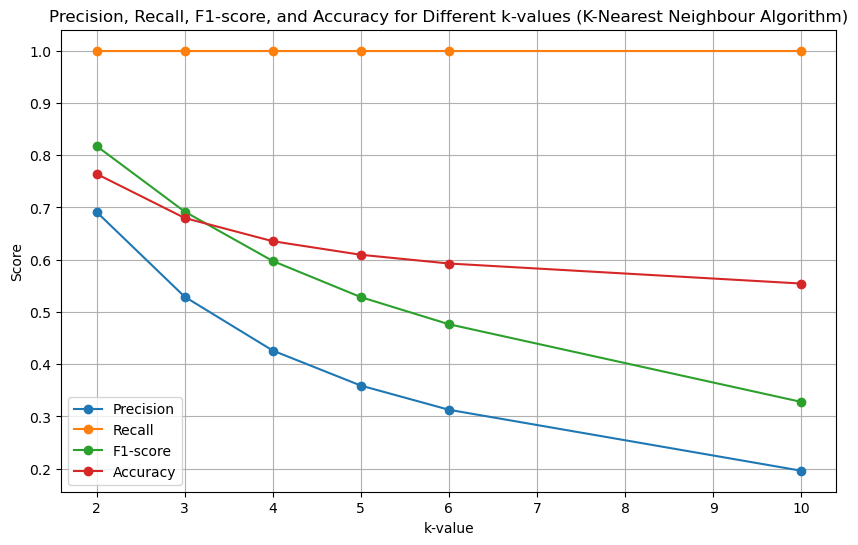

In [100]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(k_values, precision, marker='o', label='Precision')
plt.plot(k_values, recall, marker='o', label='Recall')
plt.plot(k_values, f1_scores, marker='o', label='F1-score')
plt.plot(k_values, accuracies, marker='o', label='Accuracy')

# Adding titles and labels
plt.title('Precision, Recall, F1-score, and Accuracy for Different k-values (K-Nearest Neighbour Algorithm)')
plt.xlabel('k-value')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [109]:
book_name = 'Harry Potter and the Chamber of Secrets (Book 2)'
get_recommendations(book_name)

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Exclusive',
 'The Ghost']

In [128]:
#Exporting Files

In [136]:
book_names = train_pivot.index

In [142]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(train_pivot,open('artifacts/book_pivot.pkl','wb'))

In [121]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [135]:
def get_image_urls(isbn_list):
    image_urls = []
    
    for isbn in isbn_list:
        # Check if the ISBN exists in the final_rating DataFrame
        if isbn in final_rating['ISBN'].values:
            # Fetch the image_url for the corresponding ISBN
            url = final_rating[final_rating['ISBN'] == isbn]['image_url'].values[0]
            image_urls.append(url)
        else:
            # If ISBN not found, append a placeholder or a default image URL
            image_urls.append('https://via.placeholder.com/150')  # Placeholder image URL
    
    return image_urls

In [137]:
isbn_list = ['0425166619', '0312422156', '0345443284', '0373871279', '0826308791', '0671004565', '2290305251', '1570719586', '0671023373', '0440162041']

In [139]:
get_image_urls(isbn_list)

['http://images.amazon.com/images/P/0425166619.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0312422156.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0345443284.01.LZZZZZZZ.jpg',
 'https://via.placeholder.com/150',
 'https://via.placeholder.com/150',
 'http://images.amazon.com/images/P/0671004565.01.LZZZZZZZ.jpg',
 'https://via.placeholder.com/150',
 'https://via.placeholder.com/150',
 'https://via.placeholder.com/150',
 'https://via.placeholder.com/150']